<a href="https://colab.research.google.com/github/sujithh1110/AIML11/blob/main/2303A51327_setA8_B20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

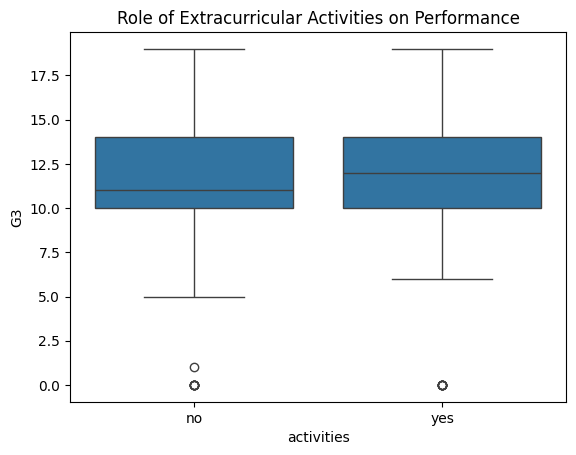

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.95      0.98      0.97       169

    accuracy                           0.94       195
   macro avg       0.91      0.84      0.87       195
weighted avg       0.94      0.94      0.94       195



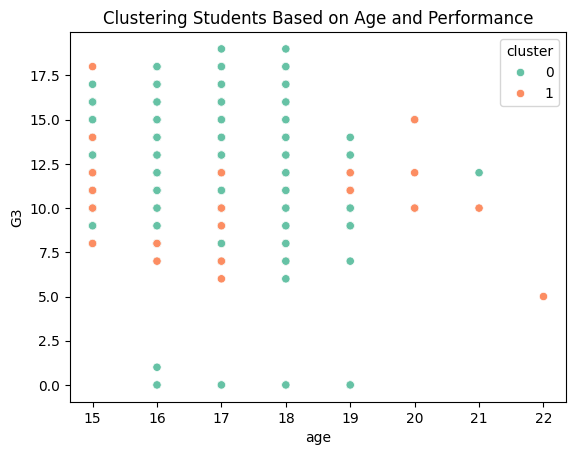

In [1]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
student_performance = fetch_ucirepo(id=320)
X = student_performance.data.features
y = student_performance.data.targets
print(student_performance.metadata)
print(student_performance.variables)
!pip install ucimlrepo
!pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo
student_performance = fetch_ucirepo(id=320)
X = student_performance.data.features
y = student_performance.data.targets
data = pd.concat([X, y], axis=1)
print(student_performance.metadata)
print(student_performance.variables)
low_performance = data[data['G3'] < 10]
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
low_performance_reasons = corr_matrix['G3'].sort_values().head(5)
print("Top 5 reasons for low performance:\n", low_performance_reasons)
both_employed_count = data[(data['Mjob'] == 'at_home') & (data['Fjob'] == 'at_home')].shape[0]
print(f"Number of students with both parents employed: {both_employed_count}")
max_age = data['age'].max()
min_age = data['age'].min()
print(f"Max age of students: {max_age}")
print(f"Min age of students: {min_age}")
most_used_medium = data['school'].mode()[0]
print(f"The most used medium of instruction: {most_used_medium}")
sns.boxplot(x='activities', y='G3', data=data)
plt.title("Role of Extracurricular Activities on Performance")
plt.show()
X_features = data.drop(['G3'], axis=1)
X_features = pd.get_dummies(X_features, drop_first=True)
y_target = data['G3'].apply(lambda x: 1 if x >= 10 else 0)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(X_features)
sns.scatterplot(x='age', y='G3', hue='cluster', data=data, palette='Set2')
plt.title("Clustering Students Based on Age and Performance")
plt.show()

In [ ]:
import pandas as pd

# Load the CSV files
math_data = pd.read_csv('student-mat[1].csv')  # Replace 'path_to' with the actual path
portuguese_data = pd.read_csv('student-por[1].csv')  # Replace 'path_to' with the actual path

# Display the first few rows of each dataset
print("Mathematics Performance Data:")
print(math_data.head())

print("\nPortuguese Performance Data:")
print(portuguese_data.head())

# Get basic info about the datasets
print("\nMathematics Data Summary:")
print(math_data.info())

print("\nPortuguese Data Summary:")
print(portuguese_data.info())

# Perform basic analysis
print("\nSummary Statistics for Mathematics Performance:")
print(math_data.describe())

print("\nSummary Statistics for Portuguese Performance:")
print(portuguese_data.describe())


Mathematics Performance Data:
  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services.